# 📈 Stock Price Prediction

This notebook demonstrates two approaches to stock price prediction:
- Linear Regression (basic features)
- LSTM (time series forecasting)


In [1]:
# 📦 Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [2]:
# Load the dataset
df = pd.read_csv('Stock_data.csv')

# Select and rename necessary columns
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Total Trade Quantity']]
df.rename(columns={'Total Trade Quantity': 'Volume'}, inplace=True)

# Convert 'Date' to datetime format and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-07-21,122.1,123.00,121.05,121.55,658666
2010-07-22,120.3,122.00,120.25,120.90,293312
2010-07-23,121.8,121.95,120.25,120.65,281312
2010-07-26,120.1,121.00,117.10,117.60,658440
2010-07-27,117.6,119.50,112.00,118.65,586100


MSE: 3.2818239182352524


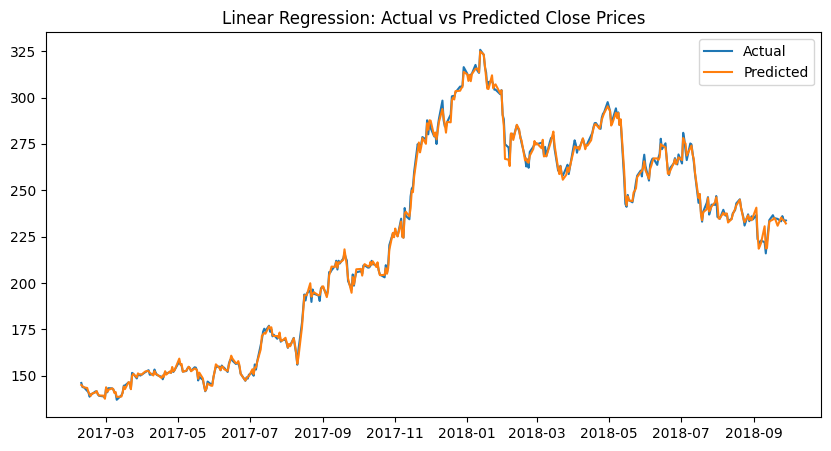

In [3]:
# 📊 Linear Regression Model
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))

plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.legend()
plt.title("Linear Regression: Actual vs Predicted Close Prices")
plt.show()

In [5]:
# 🔁 LSTM Preprocessing
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close']])

def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)
X = X.reshape(X.shape[0], X.shape[1], 1)

X_train, X_test = X[:int(len(X)*0.8)], X[int(len(X)*0.8):]
y_train, y_test = y[:int(len(y)*0.8)], y[int(len(y)*0.8):]

In [6]:
# 🧠 LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - loss: 0.0183
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0014
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 7.9573e-04
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 6.2268e-04
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 5.6216e-04
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 5.7183e-04
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 5.4399e-04
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 5.5918e-04
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 4.7731e-04
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 5.2722e-04


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


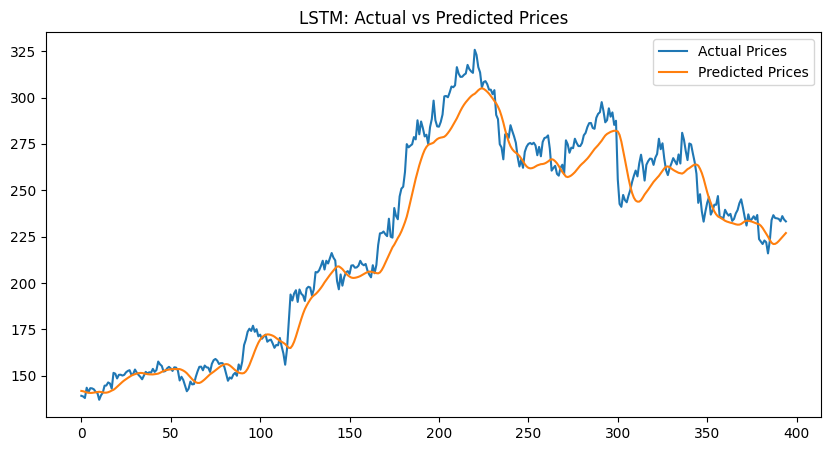

In [7]:
# 📈 LSTM Prediction
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(10,5))
plt.plot(actual_prices, label="Actual Prices")
plt.plot(predicted_prices, label="Predicted Prices")
plt.title("LSTM: Actual vs Predicted Prices")
plt.legend()
plt.show()